# Boston House Rent Project

## Problem Statement 

- To predict the price of the rent house.


### Attribute Information

- CRIM : per capita crime rate by town
- ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS : proportion of non-retail business acres per town
- CHAS : Charles River dummy variable (= 1 if tract bounds river; O otherwise)
- NOX : nitric oxides concentration (parts per 1O million)
- RM : average number of rooms per dwelling
- AGE : proportion of owner-occupied units built prior to 1940
- DIS : weighted distances to five Boston employment centres
- RAD : index of accessibility to radial highways
- TAX : full-value property-tax rate per 10,000usd
- PTRATIO : pupil-teacher ratio by town
- B : 1000(Bk - 0.63)A2 where Bk is the proportion Of blacks by town
- LSTAT : % lower status of the population

Each record in the database describes a Boston suburb or town.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor    # we are going to use AdaBoostRegressor for this model

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Initializing the dataframe
df = pd.read_csv('boston_house_rent.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

### Distribution

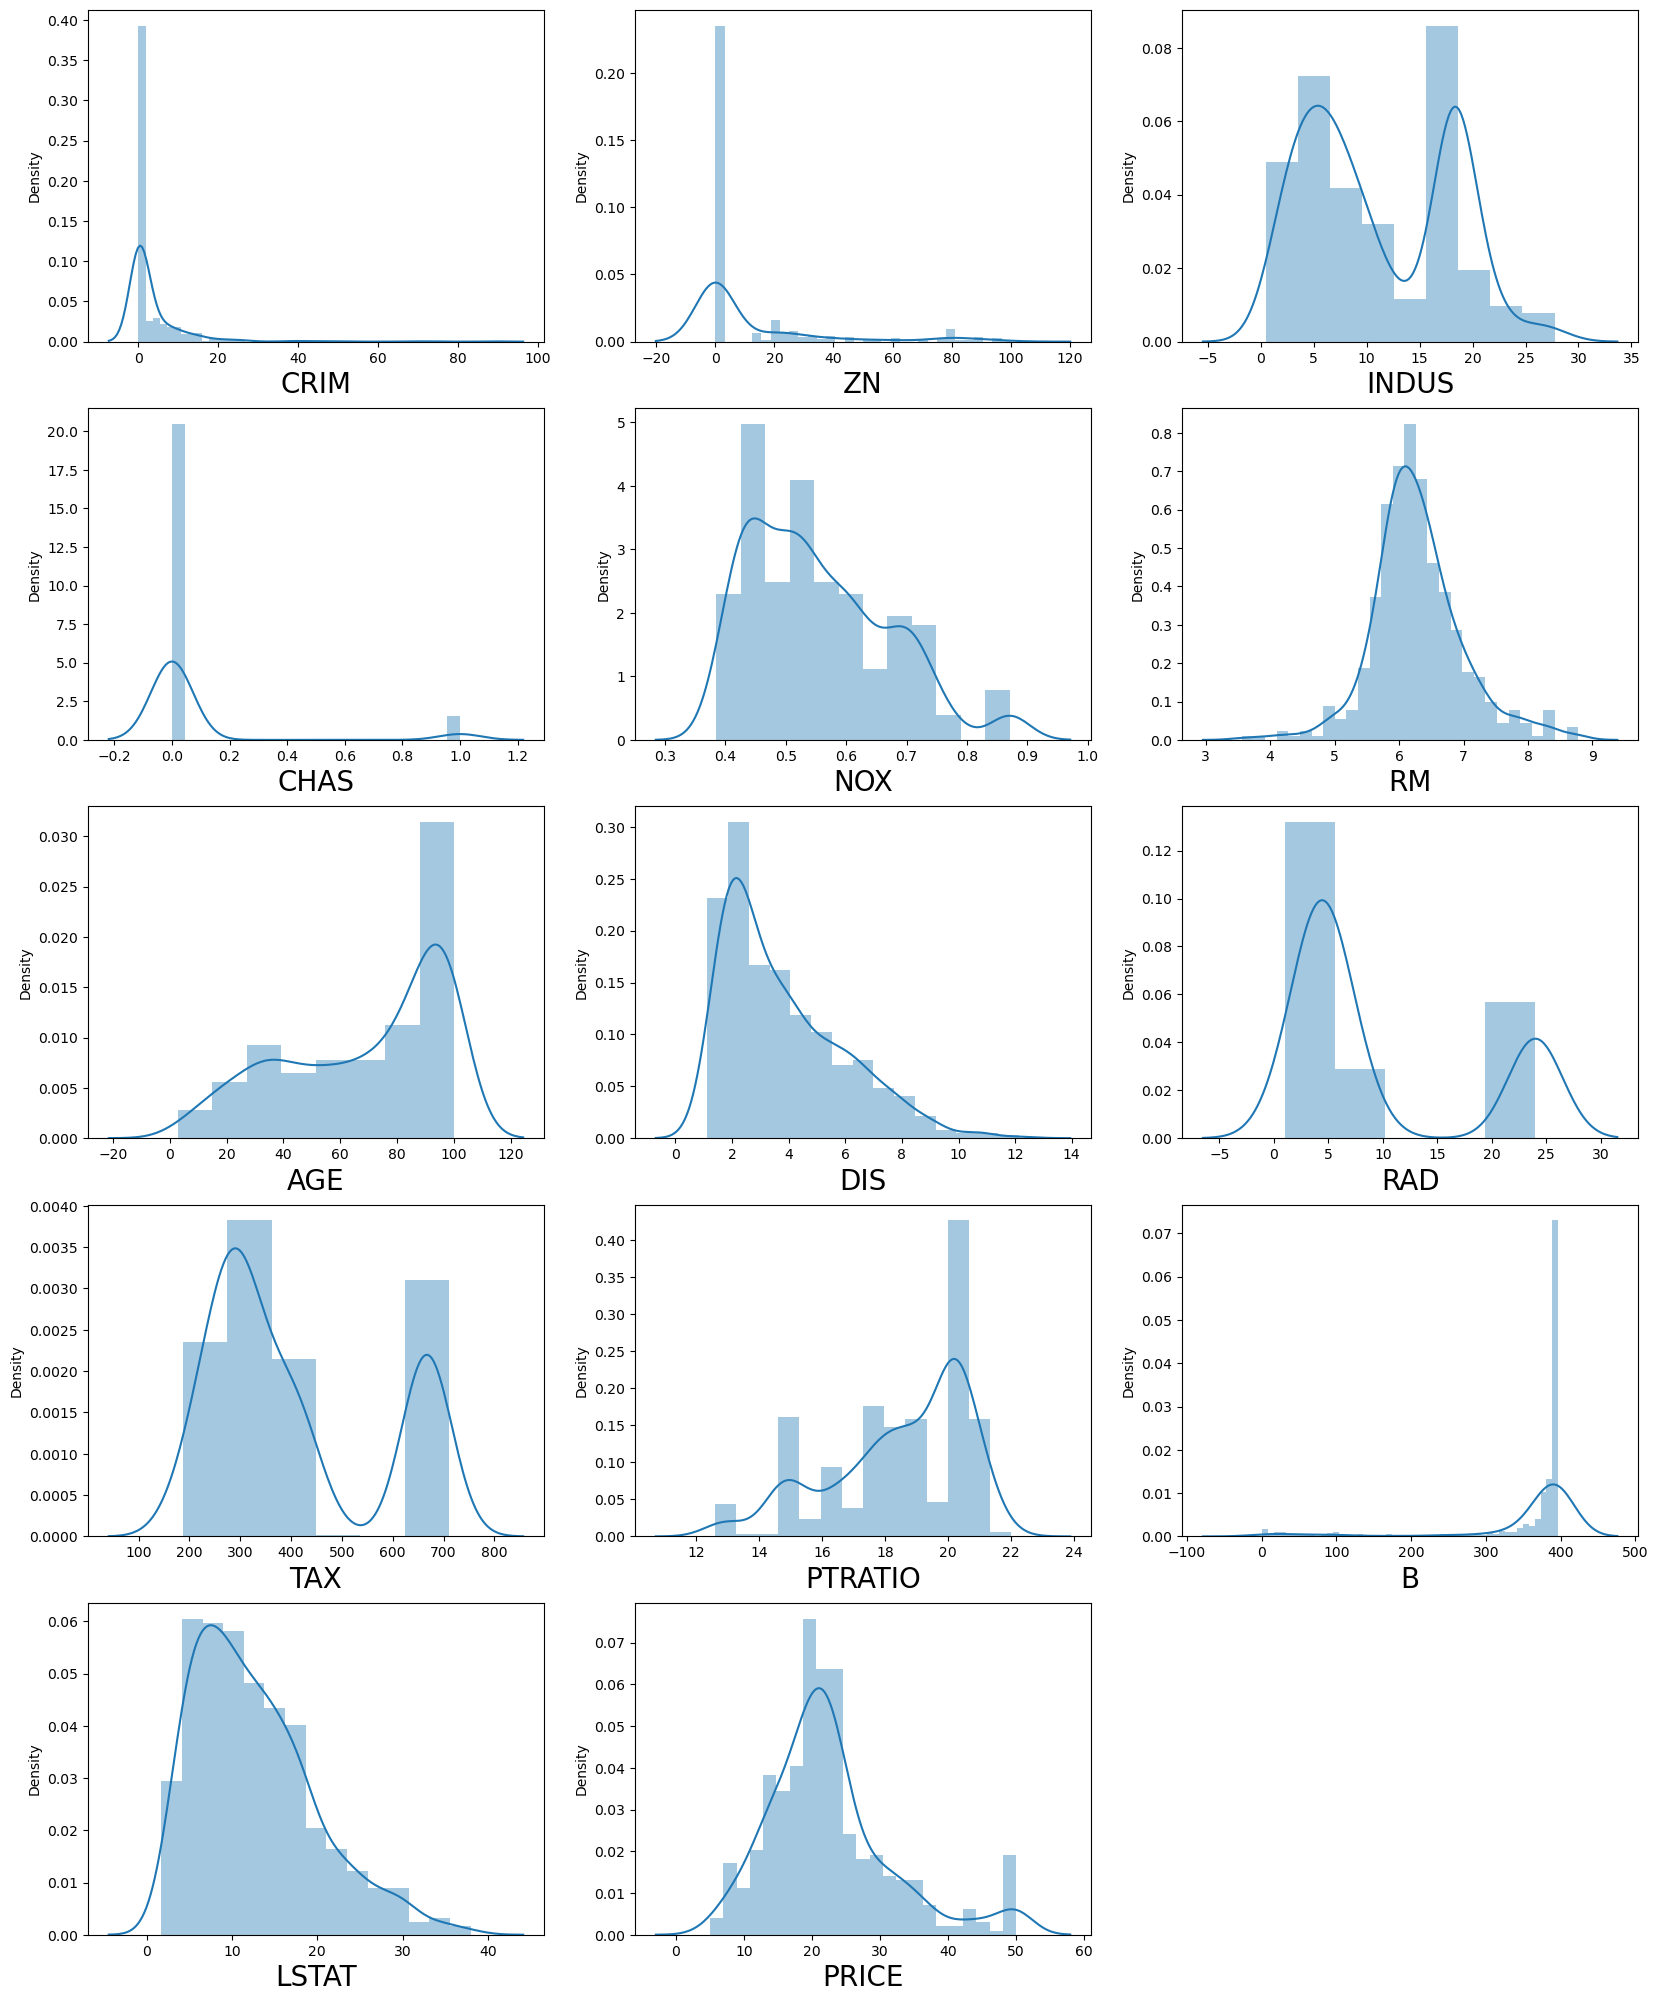

In [7]:
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df:
    if plotnumber <= 15:
        plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
plt.show()

There are some outliers in some column but we don't need to deal with it as AdaBoost bydefault handles outliers

### Multicollinearity and Correlation

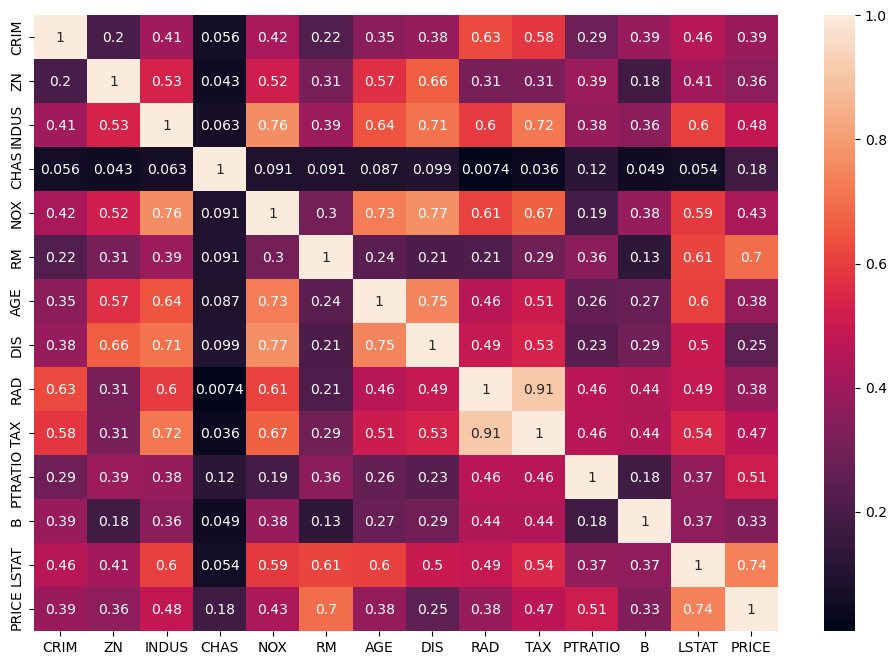

In [8]:
df_corr = df.corr().abs()

plt.figure(figsize = (12,8))
sns.heatmap(df_corr, annot = True, annot_kws = {'size' : 10})
plt.show()

Seems RAD and TAX are correlated. Lets check with scatter plot

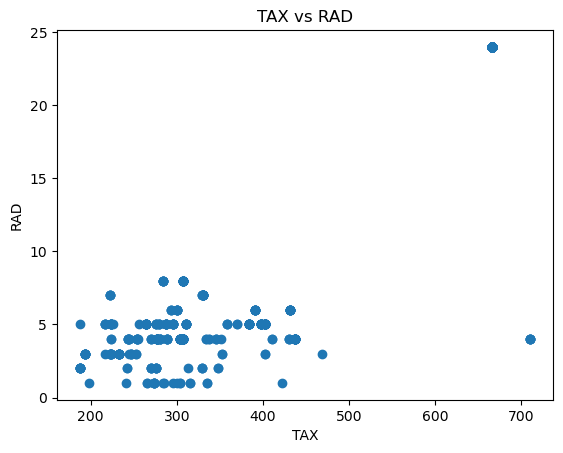

In [9]:
plt.scatter(x = 'TAX', y = 'RAD', data = df)
plt.xlabel('TAX')
plt.ylabel('RAD')
plt.title('TAX vs RAD')
plt.show()

Since we cannot confirm with plot that, there is a close relation.So we will not take risk and not deleting any features.

In [10]:
# Dividing feature and label data

x = df.drop(columns = 'PRICE')
y = df.PRICE

Standardizing the data is not required in this algorithm. (Standard Scaler)

In [11]:
# train test split

x_train,x_test,y_train,y_test = train_test_split(x ,y ,test_size = .25 , random_state = 100)

### AdaBoost Model training

In [12]:
ada = AdaBoostRegressor()

ada.fit(x_train,y_train)

AdaBoostRegressor()

In [13]:
# Model prediction on train data
train_pred = ada.predict(x_train)

In [14]:
accuracy = r2_score(y_train,train_pred)
print(f'R square score : {(accuracy) * 100:.2f} %')

R square score : 90.81 %


Since model already seen the data, so it is producing better score.

In [15]:
# Model prediction on test data
test_pred = ada.predict(x_test)

In [16]:
accuracy = r2_score(y_test,test_pred)
print(f'R square score : {(accuracy) * 100:.2f} %')

R square score : 85.47 %


### Hyperparameter Tuning using RandomizedSearchCV

In [17]:
param = {'n_estimators' : [47,50,60,70], 'learning_rate' : [0.25,0.30,0.40]}

In [18]:
rnd = RandomizedSearchCV(AdaBoostRegressor(), cv = 5, param_distributions = param)

In [19]:
rnd.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [20]:
rnd.best_params_

{'n_estimators': 60, 'learning_rate': 0.3}

In [21]:
ada = AdaBoostRegressor(n_estimators = 48, learning_rate = 0.4)
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.4, n_estimators=48)

In [22]:
ada.score(x_test,y_test)

0.8523025637550612

# By using hyperparameter tuning we achieve 85 % of score